<a href="https://colab.research.google.com/github/yoonsongg/wanted_pre_onboarding/blob/main/PreOnBoarding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://codestates.notion.site/_AIB-8aaa720522d0496bb80a707f32dc7411


#사전과제

### **문제 1) Tokenizer 생성하기**

**1-1. `preprocessing()`**

텍스트 전처리를 하는 함수입니다.

- input: 여러 영어 문장이 포함된 list 입니다. ex) ['I go to school.', 'I LIKE pizza!']
- output: 각 문장을 토큰화한 결과로, nested list 형태입니다. ex) [['i', 'go', 'to', 'school'], ['i', 'like', 'pizza']]
- 조건 1: 입력된 문장에 대해서 소문자로의 변환과 특수문자 제거를 수행합니다.
- 조건 2: 토큰화는 white space 단위로 수행합니다.
    
    

**1-2. `fit()`**

어휘 사전을 구축하는 함수입니다.

- input: 여러 영어 문장이 포함된 list 입니다. ex) ['I go to school.', 'I LIKE pizza!']
- 조건 1: 위에서 만든 `preprocessing` 함수를 이용하여 각 문장에 대해 토큰화를 수행합니다.
- 조건 2: 각각의 토큰을 정수 인덱싱 하기 위한 어휘 사전(`self.word_dict`)을 생성합니다.
    - 주어진 코드에 있는 `self.word_dict`를 활용합니다.
    

**1-3. `transform()`**

어휘 사전을 활용하여 입력 문장을 정수 인덱싱하는 함수입니다.

- input: 여러 영어 문장이 포함된 list입니다. ex) ['I go to school.', 'I LIKE pizza!']
- output: 각 문장의 정수 인덱싱으로, nested list 형태입니다. ex) [[1, 2, 3, 4], [1, 5, 6]]
- 조건 1: 어휘 사전(`self.word_dict`)에 없는 단어는 'oov'의 index로 변환합니다.

In [1]:
import re 

class Tokenizer():
  def __init__(self):
    self.word_dict = {'oov': 0}
    self.fit_checker = False
  
  def preprocessing(self, sequences):
    result = []
    '''
    문제 1-1.
    '''

    for sentence in sequences:
        sentence = sentence.lower()
        sentence = re.sub('[-=+,#/\?:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’·]', '', sentence)
        sentence = sentence.split(' ')
        result.append(sentence)

    return result
  
  def fit(self, sequences):
    self.fit_checker = False
    '''
    문제 1-2.
    '''
    result = self.preprocessing(sequences)
    result = [y for x in result for y in x]
    for word in result:
        if word not in self.word_dict:
            new_id = len(self.word_dict)
            self.word_dict[word] = new_id   

    self.fit_checker = True
  
  def transform(self, sequences):
    result = []
    tokens = self.preprocessing(sequences)
    if self.fit_checker:
      '''
      문제 1-3.
      '''
      for token in tokens:
          token = [self.word_dict['oov'] if word not in self.word_dict else self.word_dict[word] for word in token ]
          result.append(token)
      return result
    else:
      raise Exception("Tokenizer instance is not fitted yet.")
      
  def fit_transform(self, sequences):
    self.fit(sequences)
    result = self.transform(sequences)
    return result



### **문제 2) TfidfVectorizer 생성하기**

**2-1. `fit()`**

입력 문장들을 이용해 IDF 행렬을 만드는 함수입니다.

- input: 여러 영어 문장이 포함된 list 입니다. ex) ['I go to school.', 'I LIKE pizza!']
- 조건 1: IDF 행렬은 list 형태입니다.
    - ex) [토큰1에 대한 IDF 값, 토큰2에 대한 IDF 값, .... ]
- 조건 2: IDF 값은 아래 식을 이용해 구합니다.
    
    $$
    idf(d,t)=log_e(\frac{n}{1+df(d,t)})
    $$
    
    - $df(d,t)$ : 단어 t가 포함된 문장 d의 개수
    - $n$ : 입력된 전체 문장 개수
- 조건 3: 입력된 문장의 토큰화에는 문제 1에서 만든 Tokenizer를 사용합니다.
    
    

**2-2. `transform()`**

입력 문장들을 이용해 TF-IDF 행렬을 만드는 함수입니다.

- input: 여러 영어 문장이 포함된 list입니다. ex) ['I go to school.', 'I LIKE pizza!']
- output : nested list 형태입니다.
    
    ex) [[tf-idf(1, 1), tf-idf(1, 2), tf-idf(1, 3)], [tf-idf(2, 1), tf-idf(2, 2), tf-idf(2, 3)]]
    
    |  | 토큰1 | 토큰2 | 토큰3 |
    | --- | --- | --- | --- |
    | 문장1 | tf-idf(1,1) | tf-idf(1,2) | tf-idf(1,3) |
    | 문장2 | tf-idf(2,1) | tf-idf(2,2) | tf-idf(2,3) |
- 조건1 : 입력 문장을 이용해 TF 행렬을 만드세요.
    - $tf(d, t)$ : 문장 d에 단어 t가 나타난 횟수
- 조건2 : 문제 2-1( `fit()`)에서 만든 IDF 행렬과 아래 식을 이용해 TF-IDF 행렬을 만드세요

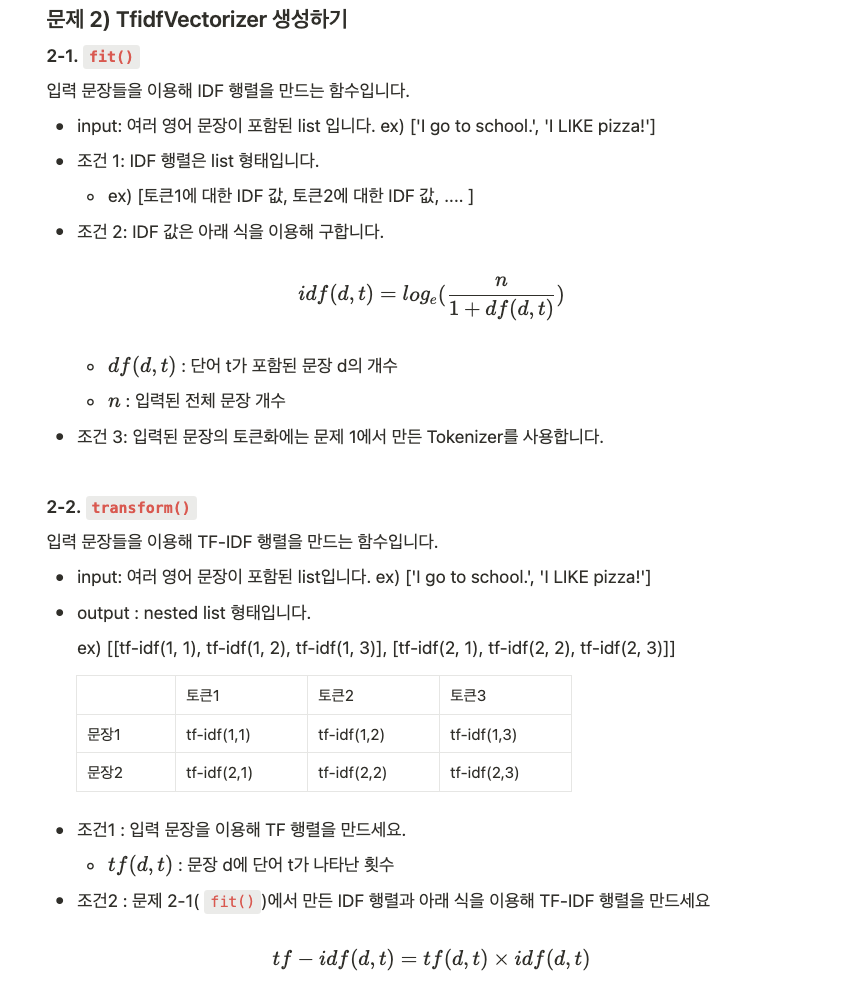

In [8]:
import pandas as pd
from math import log
import numpy as np

class TfidfVectorizer:
  def __init__(self, tokenizer):
    self.tokenizer = tokenizer
    self.fit_checker = False
  
  def fit(self, sequences):
    tokenized = self.tokenizer.fit_transform(sequences)
    '''
    문제 2-1.
    '''
    self.result = []
    n = len(tokenized)
    tokenized_flatten = set([y for x in tokenized for y in x] + [0])

    for i in tokenized_flatten:
        df = np.sum([1 if i in token else 0 for token in tokenized])
        idf = np.log(n / 1 + df)
        self.result.append(idf)
    self.result = np.array(self.result).T

    self.fit_checker = True
    

  def transform(self, sequences):
    if self.fit_checker:
      tokenized = self.tokenizer.transform(sequences)
      '''
      문제 2-2.
      '''
      tokenized_flatten = set([y for x in tokenized for y in x] + [0])
      tf = []
      for i in tokenized_flatten:
          dtm = [token.count(i) for token in tokenized]
          tf.append(dtm)
          tf_ = np.array(tf).T
      
      self.tfidf_matrix = tf_ * self.result


      return self.tfidf_matrix
    else:
      raise Exception("TfidfVectorizer instance is not fitted yet.")

  
  def fit_transform(self, sequences):
    self.fit(sequences)
    return self.transform(sequences)

#실행결과

In [9]:
sequences = ['I go to school.', 'I LIKE pizza!']
tokenizer = Tokenizer()
tf_vector = TfidfVectorizer(tokenizer)

#tf-idf matrix
print(tf_vector.fit_transform(sequences))

[[0.         1.38629436 1.09861229 1.09861229 1.09861229 0.
  0.        ]
 [0.         1.38629436 0.         0.         0.         1.09861229
  1.09861229]]


In [10]:
sequences_2 = ['I go to school', 'I like pizza!', 'I love']
print(tf_vector.transform(sequences_2))

[[0.         1.38629436 1.09861229 1.09861229 1.09861229 0.
  0.        ]
 [0.         1.38629436 0.         0.         0.         1.09861229
  1.09861229]
 [0.69314718 1.38629436 0.         0.         0.         0.
  0.        ]]


In [11]:
#word_dict
print(tokenizer.word_dict)

{'oov': 0, 'i': 1, 'go': 2, 'to': 3, 'school': 4, 'like': 5, 'pizza': 6}


#연습

In [11]:
import re
result = []
sequences = ['I go to school.', 'I LIKE pizza!']
for sentence in sequences:
    sentence = sentence.lower()
    sentence = re.sub('[-=+,#/\?:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’·]', '', sentence)
    sentence = sentence.split(' ')
    result.append(sentence)

#result : [['i', 'go', 'to', 'school'], ['i', 'like', 'pizza']]

In [12]:
result = [y for x in result for y in x]
word_dict = {'oov': 0}
for word in result:
    if word not in word_dict:
        new_id = len(word_dict)
        word_dict[word] = new_id

print(word_dict)


{'oov': 0, 'i': 1, 'go': 2, 'to': 3, 'school': 4, 'like': 5, 'pizza': 6}


In [15]:
import pandas as pd
import numpy as np

tokenized = [[1, 2, 3, 4], [1, 5, 6], [0, 6]]
#print(len(tokenized))
n = len(tokenized)
tokenized_flatten = set([y for x in tokenized for y in x])

result = []
for i in tokenized_flatten:
    df = np.sum([1 if i in token else 0 for token in tokenized])
    idf = np.log(n / 1 + df)
    result.append(idf)

print(result)


[1.3862943611198906, 1.6094379124341003, 1.3862943611198906, 1.3862943611198906, 1.3862943611198906, 1.3862943611198906, 1.6094379124341003]


In [16]:
import pandas as pd
import numpy as np

tokenized = [[1, 2, 3, 4], [1, 5, 6], [0, 6, 6]]

#print(len(tokenized))
#n = len(tokenized)
tokenized_flatten = set([y for x in tokenized for y in x])
#tf
tf = []
for i in tokenized_flatten:
    dtm = [token.count(i) for token in tokenized]
    tf.append(dtm)
    tf_ = np.array(tf).T

result = np.array(result).T
print(tf_)
print(result.shape)
print(tf_ * result)

[[0 1 1 1 1 0 0]
 [0 1 0 0 0 1 1]
 [1 0 0 0 0 0 2]]
(7,)
[[0.         1.60943791 1.38629436 1.38629436 1.38629436 0.
  0.        ]
 [0.         1.60943791 0.         0.         0.         1.38629436
  1.60943791]
 [1.38629436 0.         0.         0.         0.         0.
  3.21887582]]


In [13]:
tokens = [['i', 'go', 'to', 'school'], ['i', 'like', 'pizza'], ['love', 'pizza']]
result = []

for token in tokens:
    token = [word_dict['oov'] if word not in word_dict else word_dict[word] for word in token ]
    result.append(token)
print(result)

[[1, 2, 3, 4], [1, 5, 6], [0, 6]]
